# Introdução

Enquanto que a análise de imagem em tons de cinza exibe a imagem em uma única matriz cujos valores dos pixels representam intensidade luminosa uma imagem exibida em um canal colorido é basicamente um conjunto $N$ imagens cujos os pixels de cada imagem são valores de intensidade no canal e a representação da imagem é a composição das três imagens.

Existem diversos canais de cores, tais como os canais (i) RBG, traduzido por intensidades nas cores vermelho, azul e verde, e o canal (ii) HSI, traduzido por matiz (representação da cor), saturação da cor e intensidade da cor. Há características específicas entre os tipos de canais, alguns tendem a representar as cores como o olho humano ver, enquanto outros representam imagens coloridas de uma forma otimizada para o processamento computacional.

# Código Fonte

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pywt

- Abrir imagem:

In [2]:
cap = cv2.VideoCapture(0)

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Our operations on the frame come here
    frame_hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    lower = np.uint8([30, 100, 100])
    #lower_rbg = np.uint8([33, 209, 250])
    lower_rbg = np.uint8([0, 180, 0])
    
    upper = np.uint8([150, 255, 255])
    #upper_rbg = np.uint8([12, 58, 107])

    skinMask = cv2.inRange(frame_hsv, lower, upper)
    skinMaskCopy = skinMask
    
    res = cv2.bitwise_and(frame,frame, mask=skinMaskCopy)
    
    # Find its countour
    
    im2, contours, hierarchy = cv2.findContours(skinMaskCopy, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    # Sort all contours, largest first
    
    cnts_sorted = sorted(contours, key = cv2.contourArea, reverse = True)[:2]

    cnts_largest = cnts_sorted[0]

    cv2.drawContours(res, cnts_sorted, 0, (255,255,255), 3);
    cv2.drawContours(frame, cnts_sorted, 0, (255,255,255), 3);
    
    # Find the center of mass
    
    M = cv2.moments(cnts_largest)
    
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    
    cv2.circle(res,(cx,cy), 10, (0,0,255), -1)
    cv2.circle(frame,(cx,cy), 10, (0,0,255), -1)
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    string = str(cx) + ' X\n' + str(cy) + ' Y'
    cv2.putText(res, string,(cx+10,cy+10), font, 0.7,(255,255,255),2,cv2.LINE_AA)
            
    # Display the resulting frame
    cv2.imshow('original',frame)
    cv2.imshow('Mask', skinMask)
    cv2.imshow('frame',res)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

# Discussões sobre o método

O método utiliza conversão do sistema RBG para o sistema HSV, assim como o método utilizado para segmentação da pele, porém desta vez segmentação de um objeto colorido, em tempo real, utilizando uma webcam. 

O método consiste em: (i) realizar mudança de canal, (ii) detectar a cor do objeto, pré-definida, (iii) binarizar por meio de um limiar, utilizando a cor definida, resultando em uma máscara com o objeto segmentado, e ao final (iv) operar a imagem com a máscara, o resultado é a segmentação do objeto na imagem.

Porém, utilizando a máscara do objeto é possível utilizar métodos para achar o contorno do objeto e com essas informações calcular a centróide do objeto, posição relativa na imagem ou área ocupada pelo mesmo.

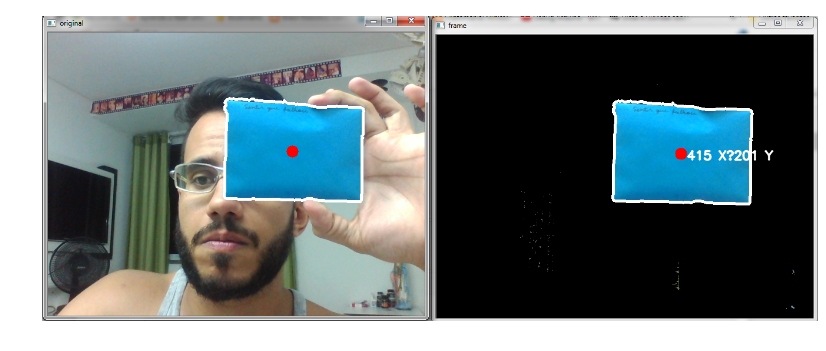

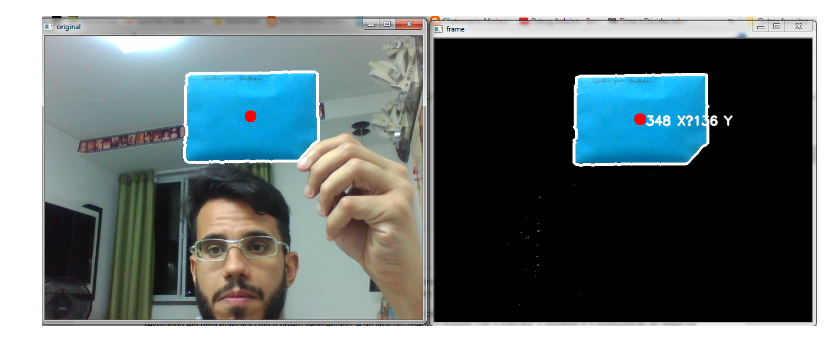

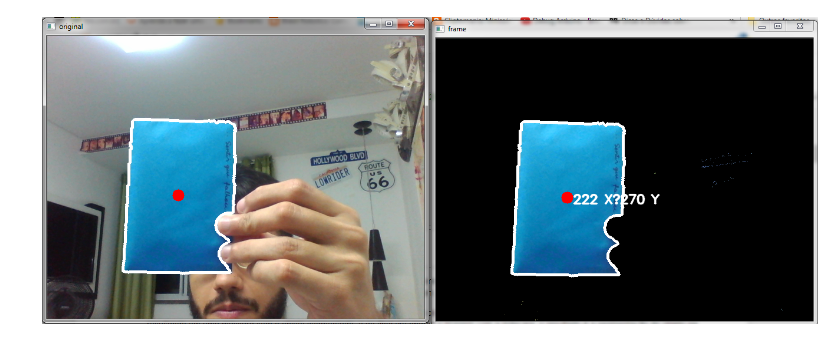

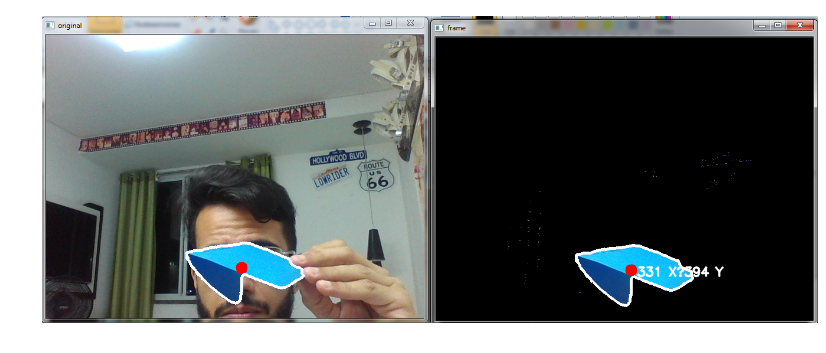

In [3]:
img = np.array(cv2.imread('print.png'))

plt.figure(1, figsize=(10,10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.figure(2, figsize=(10,10))
plt.imshow(cv2.cvtColor(np.array(cv2.imread('print02.png')), cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.figure(3, figsize=(10,10))
plt.imshow(cv2.cvtColor(np.array(cv2.imread('print05.png')), cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.figure(3+1, figsize=(10,10))
plt.imshow(cv2.cvtColor(np.array(cv2.imread('print03.png')), cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.show()

# Conclusões

O método descrito para segmentação do objeto colorido mostrou-se eficiente, pois foi possível segmentar o objeto colorido, bem como achar sua centróide.